In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import requests
from bs4 import BeautifulSoup

%matplotlib inline
pd.set_option("display.max_rows", 15)

##### ---READ_CSV() to read the dataset---

In [3]:
df = pd.read_csv(r"C:\ProgramData\MySQL\MySQL Server 8.0\Uploads\healthy_lifestyle_city_2021.csv")
df.head()

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
0,Amsterdam,1,1858,£1.92,20.40%,81.2,30.93,1434,7.44,422,1048,£34.90
1,Sydney,2,2636,£1.48,29.00%,82.1,26.86,1712,7.22,406,1103,£41.66
2,Vienna,3,1884,£1.94,20.10%,81.0,17.33,1501,7.29,132,1008,£25.74
3,Stockholm,4,1821,£1.72,20.60%,81.8,19.63,1452,7.35,129,598,£37.31
4,Copenhagen,5,1630,£2.19,19.70%,79.8,21.24,1380,7.64,154,523,£32.53


##### ---Scraping an html table with beautifulsoup to create a new dataframe---

In [4]:
req = requests.get("https://www.worldatlas.com/cities/the-world-s-10-most-visited-cities.html")
soup = BeautifulSoup(req.content, "html.parser")
table = soup.find("table")

header = []

for each in table.find_all("th"):
    header.append(each.get_text().strip())

data = []

for each in table.find_all("tr"):
    td = each.find_all("td")
    for val in td:
        data.append(val.get_text().strip())

data_rows = [data[x:x + 4] for x in range(0, len(data), 4)]

arrivals_df = pd.DataFrame(data_rows, columns=header)

arrivals_df.to_csv("arrivals.csv", index=False)

arrivals_df.head()

,Rank,City,Country,Tourist Arrivals (2018)
0,1,Hong Kong,China,"29,262,700"
1,2,Bangkok,Thailand,"24,177,500"
2,3,London,United Kingdom,"19,233,000"
3,4,Macau,China,"18,931,400"
4,5,Singapore,Singapore,"18,551,200"


##### ---SET_INDEX() to set a column name as index and STR.REPLACE() to replace some values---

In [5]:
df.set_index("City", inplace=True)

In [6]:
df["Cost of a bottle of water(City)"] = df["Cost of a bottle of water(City)"].str.replace("£", "",
                                        regex=False).str.strip()
df.rename(columns={"Cost of a bottle of water(City)": "Cost of a bottle of water(£)(City)"}, inplace=True)

df["Obesity levels(Country)"] = df["Obesity levels(Country)"].str.replace("%", "", regex=False)
df.rename(columns={"Obesity levels(Country)":"Obesity levels(%)(Country)"}, inplace=True)

df["Cost of a monthly gym membership(City)"] = df["Cost of a monthly gym membership(City)"].str.replace(
                                               "£", "", regex=False).str.strip()
df.rename(columns={"Cost of a monthly gym membership(City)":"Cost of a monthly gym membership(£)(City)"}, 
          inplace=True)

df.head()

,Rank,Sunshine hours(City),Cost of a bottle of water(£)(City),Obesity levels(%)(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(£)(City)
City,,,,,,,,,,,
Amsterdam,1,1858,1.92,20.40,81.2,30.93,1434,7.44,422,1048,34.90
Sydney,2,2636,1.48,29.00,82.1,26.86,1712,7.22,406,1103,41.66
Vienna,3,1884,1.94,20.10,81.0,17.33,1501,7.29,132,1008,25.74
Stockholm,4,1821,1.72,20.60,81.8,19.63,1452,7.35,129,598,37.31
Copenhagen,5,1630,2.19,19.70,79.8,21.24,1380,7.64,154,523,32.53


##### ---DF.ISNA().SUM() to check if there is NA values in the dataset---

In [7]:
df.isna().sum()

Rank                                         0
Sunshine hours(City)                         0
Cost of a bottle of water(£)(City)           0
Obesity levels(%)(Country)                   0
Life expectancy(years) (Country)             0
Pollution(Index score) (City)                0
Annual avg. hours worked                     0
Happiness levels(Country)                    0
Outdoor activities(City)                     0
Number of take out places(City)              0
Cost of a monthly gym membership(£)(City)    0
dtype: int64

##### ---DF.DTYPES to check the type of each column and modify it if necessary---

In [8]:
df.dtypes

Rank                                           int64
Sunshine hours(City)                          object
Cost of a bottle of water(£)(City)            object
Obesity levels(%)(Country)                    object
Life expectancy(years) (Country)             float64
Pollution(Index score) (City)                 object
Annual avg. hours worked                      object
Happiness levels(Country)                    float64
Outdoor activities(City)                       int64
Number of take out places(City)                int64
Cost of a monthly gym membership(£)(City)     object
dtype: object

In [9]:
df["Sunshine hours(City)"].unique()

df.loc[df["Sunshine hours(City)"] == "-"]
df.loc["Geneva", ["Sunshine hours(City)"]] = 1830

df["Sunshine hours(City)"] = df["Sunshine hours(City)"].astype(int)
df["Cost of a bottle of water(£)(City)"] = df["Cost of a bottle of water(£)(City)"].astype(float)
df["Obesity levels(%)(Country)"] = df["Obesity levels(%)(Country)"].astype(float)

df.loc[df["Pollution(Index score) (City)"] == "-"]
df.loc["Fukuoka", ["Pollution(Index score) (City)"]] = 41.24

df["Pollution(Index score) (City)"] = df["Pollution(Index score) (City)"].astype(float)

df.loc[df["Annual avg. hours worked"] == "-"]
df.drop("Annual avg. hours worked", axis=1, inplace=True)

df["Outdoor activities(City)"] = df["Outdoor activities(City)"].astype(int)
df["Number of take out places(City)"] = df["Number of take out places(City)"].astype(int)
df["Cost of a monthly gym membership(£)(City)"] = df["Cost of a monthly gym membership(£)(City)"].astype(float)

df.head()

,Rank,Sunshine hours(City),Cost of a bottle of water(£)(City),Obesity levels(%)(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(£)(City)
City,,,,,,,,,,
Amsterdam,1,1858,1.92,20.4,81.2,30.93,7.44,422,1048,34.90
Sydney,2,2636,1.48,29.0,82.1,26.86,7.22,406,1103,41.66
Vienna,3,1884,1.94,20.1,81.0,17.33,7.29,132,1008,25.74
Stockholm,4,1821,1.72,20.6,81.8,19.63,7.35,129,598,37.31
Copenhagen,5,1630,2.19,19.7,79.8,21.24,7.64,154,523,32.53


##### ---DUPLICATED() to check if there is some duplicated values---

In [10]:
df.index.duplicated().sum()

0

##### ---LOC to filter specifics rows---

In [11]:
df.loc[df["Sunshine hours(City)"] > 2800].sort_values(by="Sunshine hours(City)", ascending=False)["Obesity levels(%)(Country)"].mean()

27.61666666666667

In [12]:
df.loc[df["Sunshine hours(City)"] < 2200].sort_values(by="Sunshine hours(City)", ascending=False)["Obesity levels(%)(Country)"].mean()

18.908695652173915

In [13]:
norm_obes_lev = df.loc[df["Obesity levels(%)(Country)"] < 25]
high_obes_lev = df.loc[df["Obesity levels(%)(Country)"] >= 25]

##### ---DF.MERGE() to merge two dataframes---

In [14]:
merged_df = df.merge(arrivals_df[["City", "Country", "Tourist Arrivals (2018)"]], left_on="City", right_on="City")
merged_df.head()

,City,Rank,Sunshine hours(City),Cost of a bottle of water(£)(City),Obesity levels(%)(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(£)(City),Country,Tourist Arrivals (2018)
0,Amsterdam,1,1858,1.92,20.4,81.2,30.93,7.44,422,1048,34.90,Netherlands,"8,354,200"
1,Vienna,3,1884,1.94,20.1,81.0,17.33,7.29,132,1008,25.74,Austria,"6,410,300"
2,Berlin,8,1626,1.55,22.3,80.6,39.41,7.07,254,1729,26.11,Germany,"5,959,400"
3,Barcelona,9,2591,1.19,23.8,82.2,65.19,6.40,585,2344,37.80,Spain,"6,714,500"
4,Bangkok,13,2624,0.22,10.0,74.1,76.64,5.99,377,1796,50.03,Thailand,"24,177,500"


##### ---NP.WHERE to filter values based on conditions and GROUPBY() to split data into groups---

In [15]:
df["High/Low Life Expect"] = np.where(df["Life expectancy(years) (Country)"] >= 78, "High Life Expect",
                                      np.where(df["Life expectancy(years) (Country)"] < 78, "Low Life Expect",
                                               df["Life expectancy(years) (Country)"]))

df_copy = df.copy()

df_copy.reset_index(inplace=True)

high_low_expect = df_copy.groupby(["High/Low Life Expect"])["City"].apply(list).to_frame()
high_low_expect.index.name = ""
high_low_expect["Cities_Count"] = high_low_expect["City"].str.len()
high_low_expect

,City,Cities_Count
,,
High Life Expect,"[Amsterdam, Sydney, Vienna, Stockholm, Copenha...",30
Low Life Expect,"[Beijing, Bangkok, Buenos Aires, Jakarta, Ista...",14


##### ---SCATTER PLOT---

Text(0.5, 1.0, 'Relation between life expectancy and pollution (scatter plot)')

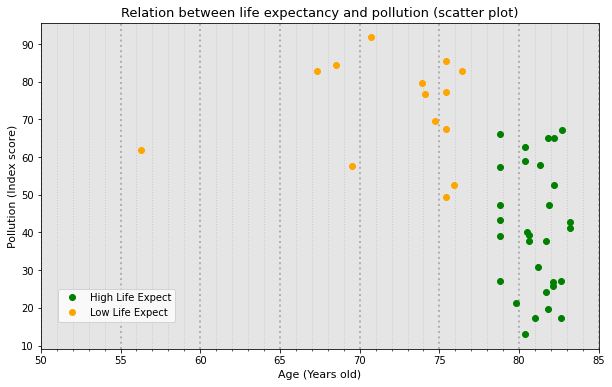

In [16]:
plot_objects = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
fig, ax = plot_objects

ax.set_facecolor("grey")
ax.patch.set_alpha(0.2)

ax.grid(which="major", axis="x", linestyle=":", linewidth=2)
ax.grid(which="minor", axis="x", linestyle=":", linewidth=1, alpha=0.5)
ax.minorticks_on()
        
colors = {"High Life Expect":"green", "Low Life Expect":"orange"}

for x, y in df_copy.groupby(["High/Low Life Expect"]):
    ax.plot(y["Life expectancy(years) (Country)"], y["Pollution(Index score) (City)"], 
            linestyle="", marker="o", label=x, color=colors[x], markersize=6)
    
ax.legend(bbox_to_anchor=(0.25, 0.2))

ax.tick_params(axis="y", which="minor", top=False, right=False, bottom=False, left=False,
               labelbottom=False, labelleft=False)

ax.set_xlim(50, 85)

ax.set_xlabel("Age (Years old)", fontsize=11)
ax.set_ylabel("Pollution (Index score)", fontsize=11)
ax.set_title("Relation between life expectancy and pollution (scatter plot)", fontsize=13)

Text(0.5, 1.0, 'Sunniest cities from the dataset (Horizontal bar)')

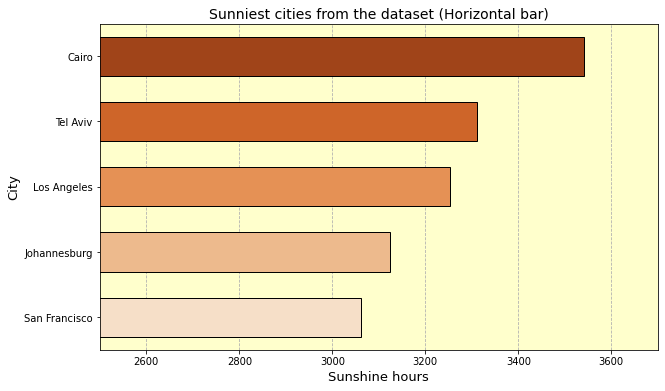

In [17]:
df_copy2 = df.copy()

plot_objects = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
fig, ax = plot_objects

ax.set_facecolor("yellow")
ax.patch.set_alpha(0.2)

ax.grid(which="major", axis="x", linestyle="--")
ax.set_axisbelow(True)

df_copy2.sort_values(by="Sunshine hours(City)", ascending=False, inplace=True)

barh = sns.barplot(x=df_copy2["Sunshine hours(City)"][:5], y=df_copy2.index[:5], 
                   palette="Oranges_r", edgecolor="black")

heights = [0.6, 0.6, 0.6, 0.6, 0.6]

for bar, hght in zip(barh.patches, heights):
    y = bar.get_y()
    height = bar.get_height()
    centre = y + (height / 2)
    bar.set_y(centre - (hght / 2))
    bar.set_height(hght)
    
ax.set_xlim(2500, 3700)

plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

ax.set_ylabel("City", fontsize=13)
ax.set_xlabel("Sunshine hours", fontsize=13)

ax.set_title("Sunniest cities from the dataset (Horizontal bar)", fontsize=14)

Text(0.5, 1.0, 'Boxplot of Life Expectancy')

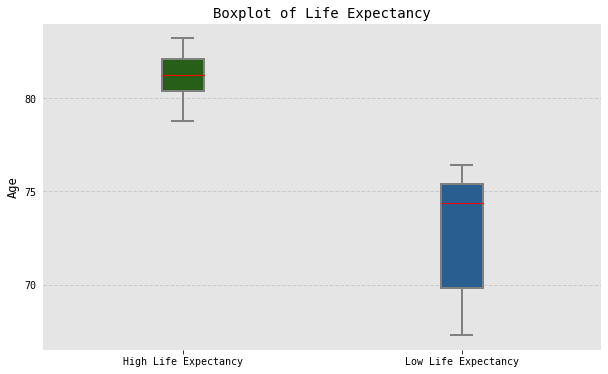

In [18]:
plot_objects = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
fig, ax = plot_objects

high_mask = df.loc[df["High/Low Life Expect"].isin(["High Life Expect"])]
low_mask = df.loc[df["High/Low Life Expect"].isin(["Low Life Expect"])]

ax.grid(which="major", axis="y", linestyle="--", linewidth=1, alpha=0.5)
ax.set_facecolor("grey")
ax.patch.set_alpha(0.2)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)

ax.yaxis.set_ticks_position("none")

box = ax.boxplot([high_mask["Life expectancy(years) (Country)"], low_mask["Life expectancy(years) (Country)"]],
                 patch_artist=True, showfliers=False,
                 medianprops={"color":"r"},
                 boxprops={"color":"grey", "linewidth":2},
                 whiskerprops={"color":"grey", "linewidth":2},
                 capprops={"color":"grey", "linewidth":2})
                     
colors = ["#265F18", "#285F90"]

for each, col in zip(box["boxes"], colors):
    each.set_facecolor(col)
    
ax.yaxis.set_major_locator(plt.MaxNLocator(4))

xticks = ax.get_xticks().tolist()
ax.xaxis.set_ticks(xticks)
ax.xaxis.set_ticklabels(["High Life Expectancy", "Low Life Expectancy"], family="monospace") 
plt.yticks(family="monospace")

ax.set_ylabel("Age", fontsize=12, family="monospace")
ax.set_title("Boxplot of Life Expectancy", fontsize=14, family="monospace")